# Homework 1

This homeworks is about setting your computational environment.  


## Task 1

Setup a [github account](github.com) and upload your work directory there after completing the tasks below. Your work directory must have the following subfolders and nothing else:

* `homeworks`: this is where you are going to keep homework notebooks
* `data`: this is where you are going to keep tha data you use in your homeworks
* `images`: this is where you are going to keep any images you generate 
* `other`: this is where you keep anything else

The top directory should not containg anything else. Put your homework notebooks (including this one) in the `homeworks` directory.

In [1]:
import os

assert [os.path.isdir("../"+x) for x in ['homeworks','data','images','other']] == [True, True, True, True]
assert os.path.isfile("../homeworks/HW1.ipynb")

## Task 2

Install the following libraries using your python package manager:

* [`numpy`](http://www.numpy.org/)
* [`pandas`](https://pandas.pydata.org/)
* [`scipy`](https://docs.scipy.org/doc/scipy/reference/index.html)
* [`scikit-learn`](http://scikit-learn.org/stable/)
* [`matplotlib`](https://matplotlib.org/)

and then run the following cell:

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import contingency_matrix
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

## Task 3

We will test if `numpy` is installed correctly.  Run the following cell. If `numpy` is installed correctly, the cell below will run quietly without an error and you will see no output.

In [3]:
a = np.matrix([[0,1],[1,0]])
assert np.array_equal(a*a, np.eye(2)) == True

## Task 4

Next, we `scipy`.  Run the following cell. If `scipy` is installed correctly, the cell below will run quietly without an error and you will see no output.

In [4]:
a = np.array(stats.norm.rvs(size=3,random_state=1234))
assert np.abs((a - np.array([0.47143516, -1.19097569,  1.43270697]))).sum() < 1e-7

## Task 5

Now, we will test if `pandas` is installed correctly.  Run the following cell. Make sure you are connected to the net. If `pandas` is installed correctly, the cell below will run quietly without an error and you will see no output.

In [5]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   sep=',',
                   header=None)

iris.to_csv("../data/iris.csv", sep=',', header=False)

assert iris.shape == (150, 5)
assert os.path.isfile('../data/iris.csv') == True

## Task 6

Next, we will test `scikitlearn`.  Run the following cell and if `scikitlearn` is installed correctly, the cell below will run quietly without an error and you will see no output.

In [6]:
X_train,X_test, y_train, y_test = train_test_split(iris.iloc[:,0:4],iris.iloc[:,4],test_size=0.33)
model = KMeans(n_clusters=3, random_state=42).fit(X_train)
result = contingency_matrix(y_test,model.predict(X_test))

assert X_train.shape == (100,4)
assert model.random_state == 42
assert result.shape == (3,3)

## Task 7

Finally, we test `matplotlib`.  I took the following code from [scipy lecture notes](https://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html) with minor modification.

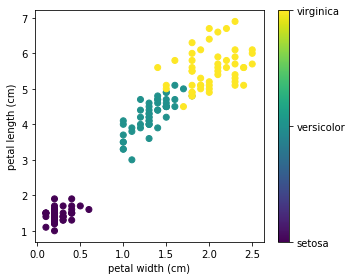

In [7]:
iris = load_iris()

x_index = 3
y_index = 2

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.savefig('../images/HW1-task6.png')
plt.show()

assert os.path.isfile('../images/HW1-task6.png')